Đang tải tokenizer cho model: infosys/NT-Java-1.1B...
Đã tìm thấy 4364 tệp .java. Bắt đầu tokenizing...


Đang xử lý các tệp: 100%|██████████| 4364/4364 [04:06<00:00, 17.68it/s]


Đã lọc dữ liệu: Giữ lại các tệp có <= 10000 token.
Tổng số tệp ban đầu: 4364
Số tệp bị loại bỏ (có > 10000 token): 629
Số tệp được đưa vào phân tích: 3735

--- Thống kê số lượng token trên dữ liệu đã lọc ---
count    3735.000000
mean     2243.147256
std      2207.609748
min        20.000000
25%       659.000000
50%      1350.000000
75%      3054.500000
max      9988.000000

Lưu ý: Model 'infosys/NT-Java-1.1B' có độ dài ngữ cảnh tối đa là 1000000000000000019884624838656 tokens.

Đang tạo biểu đồ histogram mới...


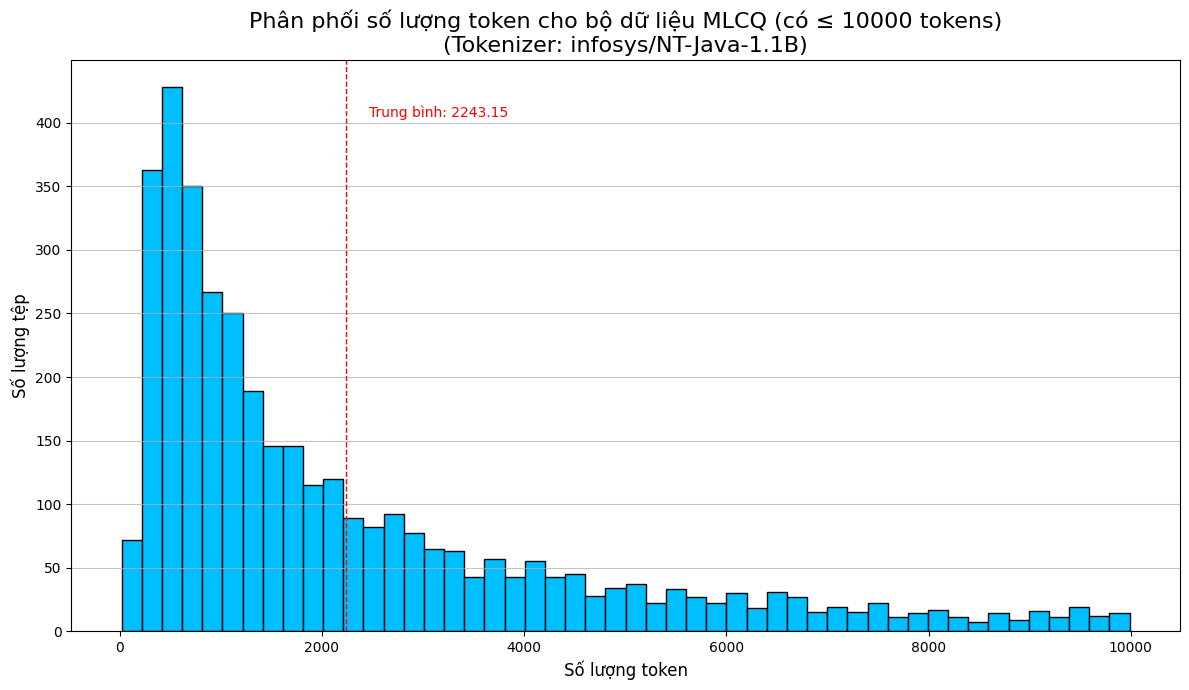

In [ ]:
import os
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
    

# Tên model trên Hugging Face
MODEL_CHECKPOINT = "infosys/NT-Java-1.1B"

# !!! QUAN TRỌNG: Thay đổi đường dẫn này thành đường dẫn thực tế của bạn
CODE_DIRECTORY = "/code-smell-detection/data/code" 

# Giới hạn số lượng token
TOKEN_LIMIT = 10000

# Kiểm tra xem đường dẫn có tồn tại không
if not os.path.isdir(CODE_DIRECTORY):
    print(f"Lỗi: Thư mục '{CODE_DIRECTORY}' không tồn tại.")
    print("Vui lòng cập nhật biến 'CODE_DIRECTORY' với đường dẫn chính xác đến thư mục chứa các tệp .java.")
else:
    """
    Phân tích và vẽ biểu đồ phân phối số lượng token của các tệp mã nguồn,
    chỉ bao gồm các tệp có số token nhỏ hơn hoặc bằng một giới hạn cho trước.

    Args:
        model_name (str): Tên của model trên Hugging Face để tải tokenizer.
        data_directory (str): Đường dẫn đến thư mục chứa các tệp .java.
        token_limit (int): Giới hạn trên của số lượng token để đưa vào phân tích.
    """
    # 1. Tải tokenizer
    try:
        print(f"Đang tải tokenizer cho model: {MODEL_CHECKPOINT}...")
        tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)
    except Exception as e:
        print(f"Lỗi khi tải tokenizer: {e}")

    # 2. Lấy danh sách các tệp .java
    java_files = []
    for root, _, files in os.walk(CODE_DIRECTORY):
        for file in files:
            if file.endswith(".java"):
                java_files.append(os.path.join(root, file))

    if not java_files:
        print(f"Không tìm thấy tệp .java nào trong thư mục: {CODE_DIRECTORY}")

    print(f"Đã tìm thấy {len(java_files)} tệp .java. Bắt đầu tokenizing...")

    # 3. Tokenize từng tệp và đếm số lượng token
    token_counts = []
    for file_path in tqdm(java_files, desc="Đang xử lý các tệp"):
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                code = f.read()
                inputs = tokenizer.encode(code, truncation=False) # Không cắt ngắn khi encode
                token_counts.append(len(inputs))
        except Exception as e:
            print(f"Lỗi khi xử lý tệp {file_path}: {e}")

    if not token_counts:
        print("Không có dữ liệu token nào được thu thập.")

    # 4. Lọc các tệp có số lượng token vượt quá giới hạn
    original_count = len(token_counts)
    filtered_token_counts = [count for count in token_counts if count <= TOKEN_LIMIT]
    filtered_out_count = original_count - len(filtered_token_counts)

    print(f"\nĐã lọc dữ liệu: Giữ lại các tệp có <= {TOKEN_LIMIT} token.")
    print(f"Tổng số tệp ban đầu: {original_count}")
    print(f"Số tệp bị loại bỏ (có > {TOKEN_LIMIT} token): {filtered_out_count}")
    print(f"Số tệp được đưa vào phân tích: {len(filtered_token_counts)}")

    if not filtered_token_counts:
        print("Không còn tệp nào sau khi lọc. Vui lòng kiểm tra lại giới hạn token.")

    # 5. Thống kê cơ bản trên dữ liệu đã lọc
    stats_df = pd.Series(filtered_token_counts).describe()
    print("\n--- Thống kê số lượng token trên dữ liệu đã lọc ---")
    print(stats_df.to_string())
    
    print(f"\nLưu ý: Model '{MODEL_CHECKPOINT}' có độ dài ngữ cảnh tối đa là {tokenizer.model_max_length} tokens.")

    # 6. Vẽ biểu đồ Histogram từ dữ liệu đã lọc
    print("\nĐang tạo biểu đồ histogram mới...")
    plt.figure(figsize=(12, 7))
    plt.hist(filtered_token_counts, bins=50, color='deepskyblue', edgecolor='black')
    plt.title(f'Phân phối số lượng token cho bộ dữ liệu MLCQ (có ≤ {TOKEN_LIMIT} tokens)\n(Tokenizer: {MODEL_CHECKPOINT})', fontsize=16)
    plt.xlabel('Số lượng token', fontsize=12)
    plt.ylabel('Số lượng tệp', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    
    # Thêm đường thẳng đứng cho giá trị trung bình của dữ liệu đã lọc
    mean_val = stats_df['mean']
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(mean_val * 1.1, max_ylim * 0.9, f'Trung bình: {mean_val:.2f}', color='red')
    
    plt.tight_layout()
    plt.show()

In [1]:
import torch
print(torch.__version__)

2.7.1+cu118


In [1]:
# pip install -q transformers
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "infosys/NT-Java-1.1B"
device = "cuda" # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint).to(device)

inputs = tokenizer.encode("public class HelloWorld {\n    public static void main(String[] args) {", return_tensors="pt").to(device)
outputs = model.generate(inputs)
print(tokenizer.decode(outputs[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello World!");
    }
}
<|endoftext|>


In [8]:
model

GPTBigCodeForCausalLM(
  (transformer): GPTBigCodeModel(
    (wte): Embedding(49152, 2048)
    (wpe): Embedding(8192, 2048)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPTBigCodeBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTBigCodeSdpaAttention(
          (c_attn): Linear(in_features=2048, out_features=2304, bias=True)
          (c_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTBigCodeMLP(
          (c_fc): Linear(in_features=2048, out_features=8192, bias=True)
          (c_proj): Linear(in_features=8192, out_features=2048, bias=True)
          (act): PytorchGELUTanh()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((2048,), ep

In [3]:
input_text = "<fim_prefix>public class PalindromeChecker {\n        public static boolean isPalindrome(String str) {\n          <fim_suffix>return true;\n      }\n<fim_middle>"
inputs = tokenizer.encode(input_text, return_tensors="pt").to(device)
outputs = model.generate(inputs)
print(tokenizer.decode(outputs[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


<fim_prefix>public class PalindromeChecker {
        public static boolean isPalindrome(String str) {
          <fim_suffix>return true;
      }
<fim_middle>  int i = 0;
            int j = str.length() - 1;
           


In [4]:
import pandas as pd
import logging
import os

def setup_logging():
    """Cấu hình thư viện logging để ghi ra file và console."""
    log_file = 'data_verification.log'
    
    # Xóa file log cũ nếu tồn tại
    if os.path.exists(log_file):
        os.remove(log_file)
        
    # Cấu hình định dạng và cấp độ log
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_file),
            logging.StreamHandler() # Để hiển thị log trên màn hình console
        ]
    )

def verify_sample_id_link_consistency(csv_file_path):
    """
    Kiểm tra trong một tệp CSV rằng nếu 'sample_id' giống nhau thì 'link' cũng phải giống nhau.

    Args:
        csv_file_path (str): Đường dẫn đến tệp CSV cần kiểm tra.
    """
    logging.info(f"Bắt đầu quá trình kiểm tra tính nhất quán cho tệp: {csv_file_path}")

    # 1. Kiểm tra xem tệp có tồn tại không
    if not os.path.exists(csv_file_path):
        logging.error(f"Lỗi: Tệp không tồn tại tại đường dẫn '{csv_file_path}'")
        return

    try:
        # 2. Đọc tệp CSV với dấu phân cách là ';'
        logging.info("Đang đọc tệp CSV bằng pandas...")
        df = pd.read_csv(csv_file_path, sep=';')
        logging.info(f"Đọc tệp thành công. Tìm thấy {len(df)} dòng.")
        
        # Đảm bảo các cột cần thiết tồn tại
        if 'sample_id' not in df.columns or 'link' not in df.columns:
            logging.error("Lỗi: Tệp CSV phải chứa các cột 'sample_id' và 'link'.")
            return

    except Exception as e:
        logging.error(f"Đã xảy ra lỗi khi đọc hoặc xử lý tệp CSV: {e}")
        return

    # 3. Nhóm theo 'sample_id' và kiểm tra
    logging.info("Bắt đầu nhóm theo 'sample_id' và kiểm tra tính nhất quán của 'link'...")
    
    # Nhóm dataframe theo 'sample_id'
    grouped = df.groupby('sample_id')

    inconsistencies_found = 0

    # Lặp qua từng nhóm
    for sample_id, group in grouped:
        # Lấy tất cả các giá trị 'link' duy nhất trong nhóm
        unique_links = group['link'].unique()
        
        # Nếu có nhiều hơn 1 link duy nhất, đó là một sự không nhất quán
        if len(unique_links) > 1:
            inconsistencies_found += 1
            logging.warning(f"KHÔNG NHẤT QUÁN cho sample_id '{sample_id}': Tìm thấy {len(unique_links)} link khác nhau.")
            # Ghi log chi tiết các link khác nhau để dễ dàng kiểm tra
            for i, link in enumerate(unique_links):
                logging.warning(f"  - Link {i+1}: {link}")

    # 4. Ghi log kết quả cuối cùng
    logging.info("Hoàn tất quá trình kiểm tra.")
    if inconsistencies_found == 0:
        logging.info("THÀNH CÔNG: Tất cả các 'sample_id' đều có 'link' nhất quán.")
    else:
        logging.error(f"KẾT THÚC: Tìm thấy tổng cộng {inconsistencies_found} 'sample_id' không nhất quán. Vui lòng xem lại các cảnh báo ở trên.")

# --- Cấu hình và thực thi ---
if __name__ == "__main__":
    # Cấu hình logging
    setup_logging()
    
    # !!! QUAN TRỌNG: Thay đổi đường dẫn này nếu cần
    CSV_FILE_PATH = "/code-smell-detection/data/MLCQCodeSmellSamples.csv"
    
    # Gọi hàm để thực hiện việc kiểm tra
    verify_sample_id_link_consistency(CSV_FILE_PATH)

2025-07-12 10:32:28,560 - INFO - Bắt đầu quá trình kiểm tra tính nhất quán cho tệp: /code-smell-detection/data/MLCQCodeSmellSamples.csv
2025-07-12 10:32:28,560 - INFO - Đang đọc tệp CSV bằng pandas...
2025-07-12 10:32:28,591 - INFO - Đọc tệp thành công. Tìm thấy 14739 dòng.
2025-07-12 10:32:28,592 - INFO - Bắt đầu nhóm theo 'sample_id' và kiểm tra tính nhất quán của 'link'...
2025-07-12 10:32:28,698 - INFO - Hoàn tất quá trình kiểm tra.
2025-07-12 10:32:28,698 - INFO - THÀNH CÔNG: Tất cả các 'sample_id' đều có 'link' nhất quán.


In [8]:
import pandas as pd
import os
import json
from tqdm import tqdm

# Cấu hình tqdm để hoạt động mượt mà với pandas.apply
tqdm.pandas()

def process_and_merge_with_validation(input_csv, output_csv, code_directory):
    """
    Đọc dữ liệu, lọc bỏ các sample_id không có file .java, tổng hợp
    các đánh giá, và lưu kết quả vào tệp CSV mới.
    """
    print("Bắt đầu quy trình xử lý và xác thực dữ liệu...")

    # --- BƯỚC 1: Quét thư mục code để lấy các ID hợp lệ ---
    print(f"Đang quét thư mục '{code_directory}' để tìm các file .java hợp lệ...")
    try:
        # Sử dụng set comprehension để có hiệu suất cao
        existing_java_ids = {
            filename[:-5]  # Bỏ đi phần đuôi '.java'
            for filename in os.listdir(code_directory)
            if filename.endswith('.java')
        }
        print(f"Tìm thấy {len(existing_java_ids)} file .java hợp lệ.")
        if not existing_java_ids:
            print("Cảnh báo: Không tìm thấy file .java nào. Tệp đầu ra sẽ trống.")
    except FileNotFoundError:
        print(f"Lỗi nghiêm trọng: Thư mục code '{code_directory}' không tồn tại. Dừng chương trình.")
        return

    # --- BƯỚC 2: Đọc tệp CSV ---
    print(f"Đang đọc tệp dữ liệu đầu vào: {input_csv}")
    try:
        df = pd.read_csv(input_csv, sep=';')
        print(f"Đọc thành công {len(df)} dòng dữ liệu.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp đầu vào tại '{input_csv}'.")
        return
    except Exception as e:
        print(f"Đã xảy ra lỗi khi đọc tệp: {e}")
        return
        
    # --- BƯỚC 3: Lọc DataFrame dựa trên các file .java đã tìm thấy ---
    original_ids = df['sample_id'].nunique()
    
    # Chuyển đổi sample_id sang kiểu string để so sánh với các ID từ tên file
    df_filtered = df[df['sample_id'].astype(str).isin(existing_java_ids)].copy()
    
    filtered_ids = df_filtered['sample_id'].nunique()
    
    # --- BƯỚC 4: Báo cáo kết quả lọc ---
    print("\n--- Kết quả lọc dữ liệu ---")
    print(f"Số sample_id ban đầu: {original_ids}")
    print(f"Số sample_id có file .java tương ứng: {filtered_ids}")
    print(f"Số sample_id đã bị loại bỏ: {original_ids - filtered_ids}")
    print("---------------------------\n")

    if df_filtered.empty:
        print("Không còn dữ liệu nào sau khi lọc. Dừng chương trình.")
        return

    # --- BƯỚC 5: Tiếp tục xử lý trên dữ liệu đã được lọc ---
    required_cols = ['sample_id', 'reviewer_id', 'smell', 'severity', 'type', 'start_line', 'end_line']
    if not all(col in df.columns for col in required_cols):
        print(f"Lỗi: Tệp đầu vào thiếu một trong các cột bắt buộc: {required_cols}")
        return
    
    grouped = df_filtered.groupby('sample_id')
    print(f"Đã nhóm dữ liệu đã lọc thành {len(grouped)} sample_id. Bắt đầu tổng hợp...")

    # Hàm tổng hợp không cần thay đổi
    def aggregate_smells_final(group):
        sample_type = group['type'].iloc[0]
        start_line = group['start_line'].iloc[0]
        end_line = group['end_line'].iloc[0]
        
        reviews_list = group[['reviewer_id', 'smell', 'severity']].to_dict(orient='records')
        review_json_string = json.dumps(reviews_list)

        total_reviewers = group['reviewer_id'].nunique()
        if total_reviewers == 0: return None

        detected_smells = []
        smells_to_check = []
        if sample_type == 'function': smells_to_check = ['feature envy', 'long method']
        elif sample_type == 'class': smells_to_check = ['blob', 'data class']

        for smell_name in smells_to_check:
            reviewers_for_smell = group[(group['smell'] == smell_name) & (group['severity'] != 'none')]['reviewer_id'].nunique()
            if (reviewers_for_smell / total_reviewers) >= 0.5:
                detected_smells.append(smell_name)
        
        final_smell = ' and '.join(sorted(detected_smells)) if detected_smells else 'none'

        return pd.Series({
            'sample_id': group.name, 'smell': final_smell, 'type': sample_type,
            'review': review_json_string, 'start_line': start_line, 'end_line': end_line
        })

    merged_data = grouped.progress_apply(aggregate_smells_final)
    merged_data.dropna(inplace=True)
    merged_data.reset_index(drop=True, inplace=True)
    
    merged_data[['sample_id', 'start_line', 'end_line']] = merged_data[['sample_id', 'start_line', 'end_line']].astype(int)
    
    final_columns_order = ['sample_id', 'smell', 'type', 'review', 'start_line', 'end_line']
    merged_data = merged_data[final_columns_order]

    # --- BƯỚC 6: Lưu kết quả ---
    try:
        output_dir = os.path.dirname(output_csv)
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)
            
        merged_data.to_csv(output_csv, index=False)
        print(f"\nXử lý hoàn tất! Đã lưu {len(merged_data)} dòng vào tệp: {output_csv}")
    except Exception as e:
        print(f"Đã xảy ra lỗi khi lưu tệp: {e}")

# --- Cấu hình và thực thi ---
if __name__ == "__main__":
    INPUT_FILE = "/code-smell-detection/data/MLCQCodeSmellSamples.csv"
    OUTPUT_FILE = "/code-smell-detection/data/MLCQ-merge.csv"
    CODE_DIR = "/code-smell-detection/data/code"  # Thêm đường dẫn thư mục code
    
    process_and_merge_with_validation(INPUT_FILE, OUTPUT_FILE, CODE_DIR)

Bắt đầu quy trình xử lý và xác thực dữ liệu...
Đang quét thư mục '/code-smell-detection/data/code' để tìm các file .java hợp lệ...
Tìm thấy 4364 file .java hợp lệ.
Đang đọc tệp dữ liệu đầu vào: /code-smell-detection/data/MLCQCodeSmellSamples.csv
Đọc thành công 14739 dòng dữ liệu.

--- Kết quả lọc dữ liệu ---
Số sample_id ban đầu: 4770
Số sample_id có file .java tương ứng: 4364
Số sample_id đã bị loại bỏ: 406
---------------------------

Đã nhóm dữ liệu đã lọc thành 4364 sample_id. Bắt đầu tổng hợp...


 33%|███▎      | 1445/4364 [00:01<00:02, 1223.06it/s]

 98%|█████████▊| 4259/4364 [00:03<00:00, 1344.32it/s]/opt/conda/lib/python3.10/site-packages/tqdm/std.py:805: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 4364/4364 [00:03<00:00, 1256.89it/s]


Xử lý hoàn tất! Đã lưu 4364 dòng vào tệp: /code-smell-detection/data/MLCQ-merge.csv


--- Bắt đầu phân tích tệp: /code-smell-detection/data/MLCQ-merge.csv ---

--- I. THỐNG KÊ TỔNG QUAN ---
Tổng số sample là CLASS: 2140
Tổng số sample là FUNCTION: 2224

--- II. SỐ LƯỢNG / TỈ LỆ SMELL = 'none' ---
Trong các CLASS: 1592/2140 (74.39%) không có smell.
Trong các FUNCTION: 1938/2224 (87.14%) không có smell.

--- III. PHÂN TÍCH CHI TIẾT TRONG CÁC CLASS ---
- Loại 'none': 1592/2140 (74.39%)
- Loại 'data class': 262/2140 (12.24%)
- Loại 'blob': 237/2140 (11.07%)
- Loại 'blob and data class': 49/2140 (2.29%)

--- IV. PHÂN TÍCH CHI TIẾT TRONG CÁC FUNCTION ---
- Loại 'none': 1938/2224 (87.14%)
- Loại 'long method': 183/2224 (8.23%)
- Loại 'feature envy and long method': 60/2224 (2.70%)
- Loại 'feature envy': 43/2224 (1.93%)

--- V. TRỰC QUAN HÓA DỮ LIỆU ---
Đang tạo biểu đồ...


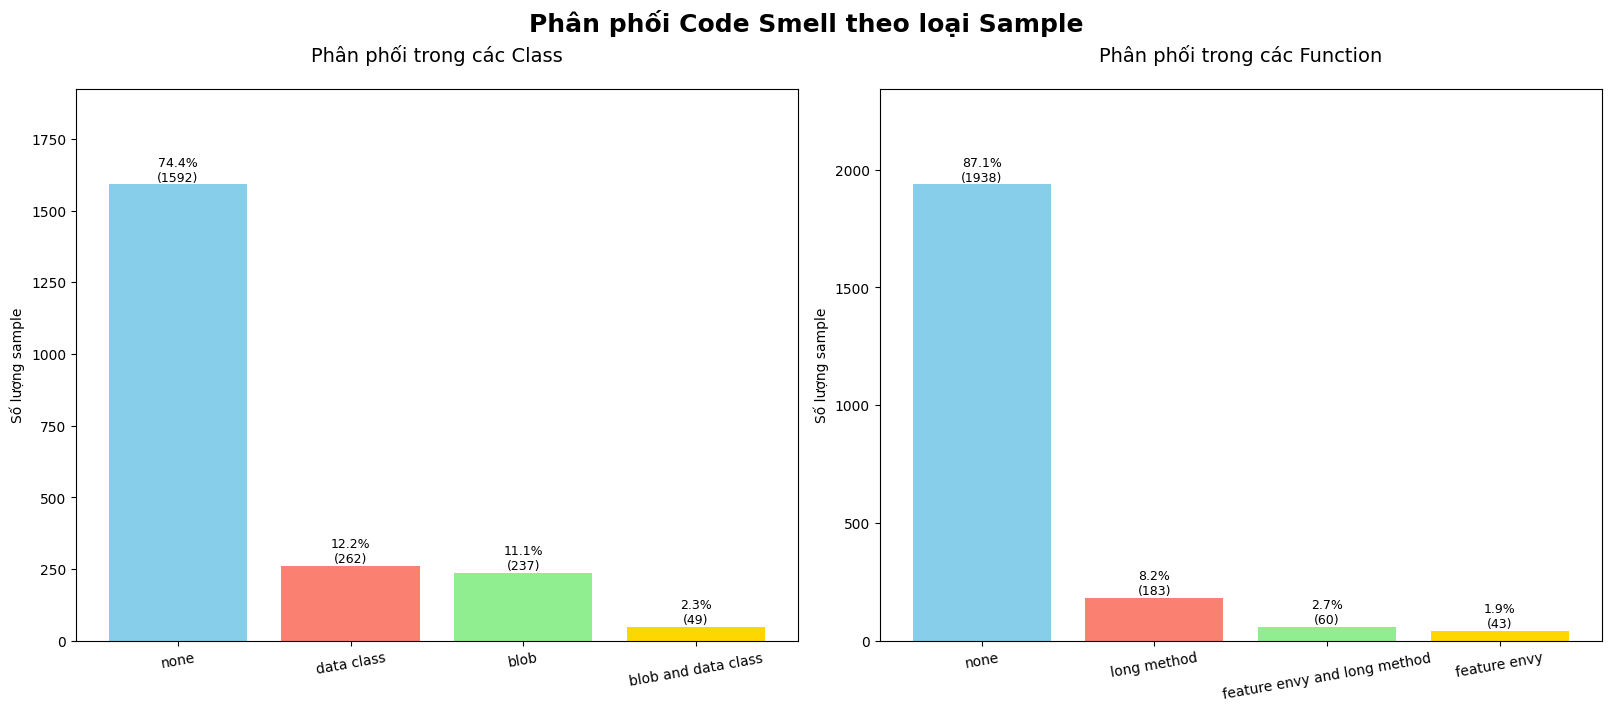

Hoàn tất.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_and_visualize_smells(input_csv):
    """
    Phân tích và trực quan hóa sự phân phối code smell từ tệp dữ liệu đã xử lý.
    """
    print(f"--- Bắt đầu phân tích tệp: {input_csv} ---")

    # 1. Đọc dữ liệu
    try:
        df = pd.read_csv(input_csv)
    except FileNotFoundError:
        print(f"\nLỖI: Không tìm thấy tệp '{input_csv}'.")
        print("Vui lòng đảm bảo bạn đã chạy script xử lý dữ liệu trước đó để tạo ra tệp này.")
        return

    # 2. Tách dữ liệu theo 'type'
    df_class = df[df['type'] == 'class'].copy()
    df_function = df[df['type'] == 'function'].copy()

    total_classes = len(df_class)
    total_functions = len(df_function)

    if total_classes == 0 and total_functions == 0:
        print("Tệp dữ liệu không chứa 'class' hoặc 'function' nào để phân tích.")
        return

    print("\n--- I. THỐNG KÊ TỔNG QUAN ---")
    print(f"Tổng số sample là CLASS: {total_classes}")
    print(f"Tổng số sample là FUNCTION: {total_functions}")

    # 3. Phân tích và trả lời câu hỏi
    
    # Câu hỏi 1: Tỉ lệ 'none'
    print("\n--- II. SỐ LƯỢNG / TỈ LỆ SMELL = 'none' ---")
    if total_classes > 0:
        none_classes_count = df_class[df_class['smell'] == 'none'].shape[0]
        none_classes_percent = (none_classes_count / total_classes) * 100
        print(f"Trong các CLASS: {none_classes_count}/{total_classes} ({none_classes_percent:.2f}%) không có smell.")
    else:
        print("Không có dữ liệu cho CLASS.")

    if total_functions > 0:
        none_functions_count = df_function[df_function['smell'] == 'none'].shape[0]
        none_functions_percent = (none_functions_count / total_functions) * 100
        print(f"Trong các FUNCTION: {none_functions_count}/{total_functions} ({none_functions_percent:.2f}%) không có smell.")
    else:
        print("Không có dữ liệu cho FUNCTION.")

    # Câu hỏi 2: Phân tích các smells trong CLASS
    print("\n--- III. PHÂN TÍCH CHI TIẾT TRONG CÁC CLASS ---")
    if total_classes > 0:
        class_smell_counts = df_class['smell'].value_counts()
        for smell, count in class_smell_counts.items():
            percent = (count / total_classes) * 100
            print(f"- Loại '{smell}': {count}/{total_classes} ({percent:.2f}%)")
    else:
        print("Không có dữ liệu để phân tích.")


    # Câu hỏi 3: Phân tích các smells trong FUNCTION
    print("\n--- IV. PHÂN TÍCH CHI TIẾT TRONG CÁC FUNCTION ---")
    if total_functions > 0:
        function_smell_counts = df_function['smell'].value_counts()
        for smell, count in function_smell_counts.items():
            percent = (count / total_functions) * 100
            print(f"- Loại '{smell}': {count}/{total_functions} ({percent:.2f}%)")
    else:
        print("Không có dữ liệu để phân tích.")


    # 4. Vẽ biểu đồ
    print("\n--- V. TRỰC QUAN HÓA DỮ LIỆU ---")
    print("Đang tạo biểu đồ...")

    # Hàm trợ giúp để vẽ biểu đồ và thêm nhãn phần trăm
    def plot_distribution(ax, data_counts, total_count, title):
        bars = ax.bar(data_counts.index, data_counts.values, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
        ax.set_title(title, fontsize=14, pad=20)
        ax.set_ylabel('Số lượng sample', fontsize=10)
        ax.tick_params(axis='x', rotation=10)
        
        # Thêm nhãn phần trăm lên trên mỗi cột
        for bar in bars:
            height = bar.get_height()
            percentage = (height / total_count) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{percentage:.1f}%\n({height})',
                ha='center',
                va='bottom',
                fontsize=9
            )
        ax.set_ylim(top=ax.get_ylim()[1] * 1.15) # Tăng không gian phía trên để nhãn không bị cắt

    fig, axes = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)
    fig.suptitle('Phân phối Code Smell theo loại Sample', fontsize=18, weight='bold')

    if total_classes > 0:
        plot_distribution(axes[0], class_smell_counts, total_classes, 'Phân phối trong các Class')
    else:
        axes[0].text(0.5, 0.5, 'Không có dữ liệu cho Class', ha='center', va='center')
        axes[0].set_title('Phân phối trong các Class')


    if total_functions > 0:
        plot_distribution(axes[1], function_smell_counts, total_functions, 'Phân phối trong các Function')
    else:
        axes[1].text(0.5, 0.5, 'Không có dữ liệu cho Function', ha='center', va='center')
        axes[1].set_title('Phân phối trong các Function')

    plt.show()
    print("Hoàn tất.")


# --- Cấu hình và thực thi ---
if __name__ == "__main__":
    # Đường dẫn đến tệp dữ liệu đã được xử lý
    MERGED_FILE = "/code-smell-detection/data/MLCQ-merge.csv"
    
    analyze_and_visualize_smells(MERGED_FILE)

In [10]:
import json
import os

def create_finetune_sample_from_file(sample_id, smell, type, start_line, end_line, code_directory):
    """
    Tạo một mẫu dữ liệu fine-tune theo định dạng Fill-in-the-Middle bằng cách
    đọc trực tiếp từ file .java tương ứng.

    Args:
        sample_id (int): ID của sample.
        smell (str): Nhãn code smell đã được tổng hợp.
        type (str): Loại code (class hoặc function).
        start_line (int): Dòng bắt đầu của đoạn code.
        end_line (int): Dòng kết thúc của đoạn code.
        code_directory (str): Đường dẫn đến thư mục chứa các file .java.

    Returns:
        dict or None: Một dictionary chứa dữ liệu đã định dạng, hoặc None nếu có lỗi.
    """
    print(f"--- Đang xử lý Sample ID: {sample_id} ---")
    
    # 1. Xây dựng đường dẫn file và đọc nội dung
    file_path = os.path.join(code_directory, f"{sample_id}.java")
    print(f"Đang đọc file: {file_path}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            java_code = f.read()
    except FileNotFoundError:
        print(f"LỖI: Không tìm thấy file tại '{file_path}'. Bỏ qua sample này.")
        return None
    except Exception as e:
        print(f"LỖI: Không thể đọc file '{file_path}'. Lỗi: {e}. Bỏ qua sample này.")
        return None

    # 2. Tạo nội dung cần điền vào giữa (phần 'middle')
    if smell == 'none':
        middle_content = f"// {type} below has no smell\n"
    else:
        middle_content = f"// {type} below is {smell}\n"

    # 3. Tách file code thành các dòng
    lines = java_code.splitlines()
    
    # Kiểm tra xem start_line có hợp lệ không
    if start_line > len(lines) or start_line < 1:
        print(f"LỖI: start_line ({start_line}) nằm ngoài phạm vi của file ({len(lines)} dòng). Bỏ qua sample này.")
        return None

    # 4. Tạo phần tiền tố (prefix) và hậu tố (suffix)
    prefix_lines = lines[:start_line - 1]
    prefix_content = "\n".join(prefix_lines)

    suffix_lines = lines[start_line - 1:]
    suffix_content = "\n".join(suffix_lines)

    print(f"Đoạn code cần chèn comment vào trước:\n---\n{lines[start_line-1]}\n---\n")
    print(f"Comment sẽ được tạo ra (middle part):\n---\n{middle_content.strip()}\n---\n")

    # 5. Xây dựng chuỗi văn bản hoàn chỉnh cho việc fine-tuning
    full_text = f"<fim_prefix>{prefix_content}\n<fim_suffix>{suffix_content}<fim_middle>{middle_content}"

    # 6. Tạo cấu trúc file JSON
    output_data = {
        "text": full_text
    }

    return output_data

# --- Dữ liệu đầu vào cho ví dụ ---
sample_id = 3723043
smell = "data class"
type = "class"
start_line = 220
end_line = 302
# Đường dẫn đến thư mục chứa các file code
code_directory = "/code-smell-detection/data/code"


# --- Chạy xử lý và lưu file JSON ---
if __name__ == "__main__":
    # Gọi hàm để tạo dữ liệu
    formatted_data = create_finetune_sample_from_file(
        sample_id, smell, type, start_line, end_line, code_directory
    )
    
    # Chỉ lưu file nếu quá trình xử lý thành công
    if formatted_data:
        output_filename = f"{sample_id}.json"
        with open(output_filename, 'w', encoding='utf-8') as f:
            json.dump(formatted_data, f, indent=4, ensure_ascii=False)
            
        print(f"\nĐã tạo thành công file '{output_filename}'.")
    else:
        print(f"\nKhông thể tạo file cho sample_id {sample_id} do có lỗi xảy ra.")

--- Đang xử lý Sample ID: 3723043 ---
Đang đọc file: /code-smell-detection/data/code/3723043.java
Đoạn code cần chèn comment vào trước:
---
public class MultiDexConfig {
---

Comment sẽ được tạo ra (middle part):
---
// class below is data class
---


Đã tạo thành công file '3723043.json'.


In [20]:
import pandas as pd
import os
import json
from transformers import AutoTokenizer
from tqdm import tqdm

def is_line_empty(line: str) -> bool:
    """Kiểm tra xem một dòng có phải là dòng trống hoặc chỉ chứa khoảng trắng."""
    return not line.strip()

def process_single_sample_with_debug(
    row, code_dir, output_dir, tokenizer, max_tokens
):
    """
    Xử lý một sample duy nhất và in ra một báo cáo gỡ lỗi chi tiết.
    """
    sample_id = row['sample_id']
    print(f"\n{'='*20} DEBUG REPORT FOR SAMPLE_ID: {sample_id} {'='*20}")

    file_path = os.path.join(code_dir, f"{sample_id}.java")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.read().splitlines()
    except FileNotFoundError:
        print(f"LỖI: Không tìm thấy file tại '{file_path}'.")
        return False, False

    start_line_idx = row['start_line'] - 1
    end_line_idx = row['end_line']

    if not (0 <= start_line_idx < end_line_idx <= len(lines)):
        print("LỖI: start_line/end_line không hợp lệ.")
        return False, True

    prefix_lines = lines[:start_line_idx]
    target_lines = lines[start_line_idx:end_line_idx]
    suffix_lines = lines[end_line_idx:]
    
    middle_content = (f"// {row['type']} below has no smell\n"
                    if row['smell'] == 'none'
                    else f"// {row['type']} below is {row['smell']}\n")

    # --- Báo cáo trạng thái ban đầu ---
    initial_prefix_str = "\n".join(prefix_lines)
    initial_target_suffix_str = "\n".join(target_lines + suffix_lines)
    initial_string = f"<fim_prefix>{initial_prefix_str}\n<fim_suffix>{initial_target_suffix_str}<fim_middle>{middle_content}"
    initial_token_count = len(tokenizer.encode(initial_string, truncation=False))
    
    print(f"--- TRẠNG THÁI BAN ĐẦU ---")
    print(f"Số token ban đầu: {initial_token_count} (Giới hạn: {max_tokens})")
    print(f"Số dòng Prefix/Target/Suffix: {len(prefix_lines)}/{len(target_lines)}/{len(suffix_lines)}")

    if initial_token_count > max_tokens:
        print("\n--- BẮT ĐẦU QUÁ TRÌNH CẮT TỈA ---")

    deleted_lines_log = []
    is_valid_sample = True
    fim_string = "" # Khởi tạo fim_string

    # === VÒNG LẶP ĐÃ ĐƯỢC TÁI CẤU TRÚC ===
    while True:
        # 1. Luôn tính toán lại trạng thái ở đầu mỗi vòng lặp
        current_prefix_str = "\n".join(prefix_lines)
        current_target_suffix_str = "\n".join(target_lines + suffix_lines)
        fim_string = f"<fim_prefix>{current_prefix_str}\n<fim_suffix>{current_target_suffix_str}<fim_middle>{middle_content}"
        current_token_count = len(tokenizer.encode(fim_string, truncation=False))

        # 2. Kiểm tra điều kiện dừng
        if current_token_count <= max_tokens:
            break
            
        line_removed = False
        
        # 3. Thực hiện MỘT hành động xóa
        # Ưu tiên 1 & 2: Xóa dòng trống BÊN NGOÀI
        for i in range(len(suffix_lines) - 1, -1, -1):
            if is_line_empty(suffix_lines[i]):
                deleted_line = suffix_lines.pop(i)
                deleted_lines_log.append(f"[Suffix Empty] Đã xóa: '{deleted_line}'")
                line_removed = True
                break
        if line_removed: continue

        for i in range(len(prefix_lines)):
            if is_line_empty(prefix_lines[i]):
                deleted_line = prefix_lines.pop(i)
                deleted_lines_log.append(f"[Prefix Empty] Đã xóa: '{deleted_line}'")
                line_removed = True
                break
        if line_removed: continue
        
        # Ưu tiên 3: Xóa dòng trống BÊN TRONG target_lines
        for i in range(len(target_lines) - 1, -1, -1):
            if is_line_empty(target_lines[i]):
                deleted_line = target_lines.pop(i)
                deleted_lines_log.append(f"[Target Empty] Đã xóa: '{deleted_line}'")
                line_removed = True
                break
        if line_removed: continue

        # Ưu tiên 4 & 5: Xóa dòng code/comment BÊN NGOÀI
        if prefix_lines or suffix_lines:
            if suffix_lines:
                deleted_line = suffix_lines.pop()
                deleted_lines_log.append(f"[Suffix Code]  Đã xóa: '{deleted_line}'")
            else: # Chỉ xóa prefix nếu suffix đã hết
                deleted_line = prefix_lines.pop(0)
                deleted_lines_log.append(f"[Prefix Code]  Đã xóa: '{deleted_line}'")
            continue

        # Ưu tiên 6: Cắt chính target block
        elif len(target_lines) > 1:
            deleted_line = target_lines.pop()
            deleted_lines_log.append(f"[Target Code]  Đã xóa: '{deleted_line}'")
            continue
        
        # 4. Nếu không thể xóa được nữa
        is_valid_sample = False
        break
    
    # --- IN BÁO CÁO CUỐI CÙNG ---
    print("\n--- NHẬT KÝ XÓA DÒNG ---")
    if not deleted_lines_log:
        print("Không có dòng nào bị xóa.")
    else:
        for log_entry in deleted_lines_log:
            print(f"  - {log_entry}")

    print(f"\n--- TRẠNG THÁI CUỐI CÙNG ---")
    print(f"Số token cuối cùng: {current_token_count}")
    print(f"Số dòng Prefix/Target/Suffix còn lại: {len(prefix_lines)}/{len(target_lines)}/{len(suffix_lines)}")

    if not is_valid_sample or not target_lines:
        print("Sample không hợp lệ sau khi cắt tỉa.")
        return False, True

    # Lưu file
    output_data = {"text": fim_string}
    output_filename = os.path.join(output_dir, f"{sample_id}.json")
    try:
        with open(output_filename, 'w', encoding='utf-8') as f:
            json.dump(output_data, f, indent=4)
        print(f"\nĐã lưu file thành công vào: {output_filename}")
        print("\n--- NỘI DUNG FILE JSON CUỐI CÙNG ---")
        print(json.dumps(output_data, indent=4))
        print(f"\n{'='*25} KẾT THÚC BÁO CÁO {'='*25}\n")
        return True, False
    except Exception as e:
        print(f"Lỗi khi ghi file: {e}")
        return False, True


def create_finetune_data_for_debug(
    csv_path, code_dir, output_dir, model_name, max_tokens=2048
):
    """Hàm chính để điều phối việc xử lý và gỡ lỗi."""
    print("--- Chế độ GỠ LỖI: Sẽ chỉ xử lý sample đầu tiên. ---")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Lỗi khi tải dữ liệu hoặc tokenizer: {e}")
        return

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    success_count = 0
    skipped_count = 0
    
    if not df.empty:
        first_row = df.iloc[0]
        success, skipped = process_single_sample_with_debug(
            first_row, code_dir, output_dir, tokenizer, max_tokens
        )
        if success: success_count += 1
        if skipped: skipped_count += 1
    else:
        print("File CSV trống.")
            
    print("\n--- HOÀN TẤT CHẾ ĐỘ GỠ LỖI ---")
    print(f"Tổng số sample đã xử lý thành công: {success_count}")
    print(f"Tổng số sample đã bỏ qua: {skipped_count}")


# --- Cấu hình và thực thi ---
if __name__ == "__main__":
    MERGED_CSV_FILE = "/code-smell-detection/data/MLCQ-merge.csv"
    CODE_DIRECTORY = "/code-smell-detection/data/code"
    FINETUNE_OUTPUT_DIRECTORY = "/code-smell-detection/data/finetune_data_final"
    MODEL_NAME = "infosys/NT-Java-1.1B"
    MAX_TOKENS_LIMIT = 128 # Giữ nguyên giới hạn thấp để debug
    
    create_finetune_data_for_debug(
        MERGED_CSV_FILE,
        CODE_DIRECTORY,
        FINETUNE_OUTPUT_DIRECTORY,
        MODEL_NAME,
        MAX_TOKENS_LIMIT
    )

--- Chế độ GỠ LỖI: Sẽ chỉ xử lý sample đầu tiên. ---

==================== DEBUG REPORT FOR SAMPLE_ID: 3698323 ====================
--- TRẠNG THÁI BAN ĐẦU ---
Số token ban đầu: 535 (Giới hạn: 128)
Số dòng Prefix/Target/Suffix: 25/34/0

--- BẮT ĐẦU QUÁ TRÌNH CẮT TỈA ---

--- NHẬT KÝ XÓA DÒNG ---
  - [Prefix Empty] Đã xóa: ''
  - [Prefix Empty] Đã xóa: ''
  - [Prefix Empty] Đã xóa: ''
  - [Prefix Empty] Đã xóa: ''
  - [Target Empty] Đã xóa: ''
  - [Target Empty] Đã xóa: ''
  - [Target Empty] Đã xóa: ''
  - [Target Empty] Đã xóa: ''
  - [Target Empty] Đã xóa: ''
  - [Prefix Code]  Đã xóa: '/*'
  - [Prefix Code]  Đã xóa: '* Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.'
  - [Prefix Code]  Đã xóa: '*'
  - [Prefix Code]  Đã xóa: '* Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file'
  - [Prefix Code]  Đã xóa: '* except in compliance with the License. A copy of the License is located at'
  - [Prefix Code]  Đã xóa: '*'
  - [Prefi

In [1]:
import pandas as pd
import os
import json
import logging
from transformers import AutoTokenizer
from tqdm import tqdm

def setup_logging(log_file='data_preparation_augmented.log'):
    """Cấu hình logging để ghi ra file và console."""
    if os.path.exists(log_file):
        os.remove(log_file)
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_file),
            logging.StreamHandler()
        ]
    )
    logging.getLogger("transformers").setLevel(logging.ERROR)

def is_line_empty(line: str) -> bool:
    """Kiểm tra xem một dòng có phải là dòng trống hoặc chỉ chứa khoảng trắng."""
    return not line.strip()

def process_and_save_sample(sample_id, middle_content, prefix_lines, target_lines, suffix_lines, tokenizer, max_tokens, output_filename):
    """
    Hàm con để xử lý cắt tỉa và lưu một phiên bản của sample.
    """
    is_valid_sample = True
    fim_string = ""

    while True:
        current_prefix_str = "\n".join(prefix_lines)
        current_target_suffix_str = "\n".join(target_lines + suffix_lines)
        fim_string = f"<fim_prefix>{current_prefix_str}\n<fim_suffix>{current_target_suffix_str}<fim_middle>{middle_content}"
        current_token_count = len(tokenizer.encode(fim_string, truncation=False))

        if current_token_count <= max_tokens:
            break
        
        tokens_to_remove = current_token_count - max_tokens
        tokens_collected = 0
        indices_to_delete = {'prefix': set(), 'target': set(), 'suffix': set()}

        rules = [
            ("Suffix Empty", suffix_lines, 'suffix', reversed(range(len(suffix_lines))), is_line_empty),
            ("Prefix Empty", prefix_lines, 'prefix', range(len(prefix_lines)), is_line_empty),
            ("Target Empty", target_lines, 'target', reversed(range(len(target_lines))), is_line_empty),
            ("Suffix Code", suffix_lines, 'suffix', reversed(range(len(suffix_lines))), lambda l: True),
            ("Prefix Code", prefix_lines, 'prefix', range(len(prefix_lines)), lambda l: True),
            ("Target Code", target_lines, 'target', reversed(range(len(target_lines))), lambda l: len(target_lines) - len(indices_to_delete['target']) > 1),
        ]
        
        enough_lines_collected = False
        for reason, line_list, key, index_iter, condition_fn in rules:
            if enough_lines_collected: break
            for i in index_iter:
                if i in indices_to_delete[key]: continue
                if condition_fn(line_list[i]):
                    line_token_count = len(tokenizer.encode(line_list[i]))
                    tokens_collected += line_token_count
                    indices_to_delete[key].add(i)
                    if tokens_collected >= tokens_to_remove:
                        enough_lines_collected = True
                        break
        
        if not any(indices_to_delete.values()):
            is_valid_sample = False
            break

        logging.debug(f"Sample {sample_id}: Xóa hàng loạt {sum(len(s) for s in indices_to_delete.values())} dòng.")
        prefix_lines = [line for i, line in enumerate(prefix_lines) if i not in indices_to_delete['prefix']]
        target_lines = [line for i, line in enumerate(target_lines) if i not in indices_to_delete['target']]
        suffix_lines = [line for i, line in enumerate(suffix_lines) if i not in indices_to_delete['suffix']]

    if not is_valid_sample or not target_lines:
        logging.warning(f"Bỏ qua sample {sample_id} (phiên bản): Không thể cắt tỉa để vừa giới hạn token.")
        return False

    output_data = {"text": fim_string}
    try:
        with open(output_filename, 'w', encoding='utf-8') as f:
            json.dump(output_data, f)
        return True
    except Exception as e:
        logging.error(f"Lỗi khi ghi file {output_filename}: {e}")
        return False


def create_augmented_finetune_data(
    csv_path, code_dir, output_dir, model_name, max_tokens=2048
):
    """Hàm chính để điều phối việc xử lý và tăng cường dữ liệu."""
    setup_logging()
    logging.info(f"--- Bắt đầu quy trình tạo dữ liệu tăng cường (giới hạn {max_tokens} token) ---")

    logging.info(f"Đang tải tokenizer: {model_name}...")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
    except Exception as e:
        logging.error(f"LỖI NGHIÊM TRỌNG: Không thể tải tokenizer. Dừng. Lỗi: {e}")
        return

    try:
        df = pd.read_csv(csv_path)
        logging.info(f"Đọc thành công file {csv_path}. Tìm thấy {len(df)} sample.")
    except FileNotFoundError:
        logging.error(f"LỖI: Không tìm thấy file CSV tại '{csv_path}'.")
        return

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        logging.info(f"Đã tạo thư mục đầu ra: {output_dir}")

    success_count, skipped_count = 0, 0
    
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Đang xử lý và tăng cường dữ liệu"):
        sample_id = row['sample_id']
        smell = row['smell']
        smell_type = row['type']
        file_path = os.path.join(code_dir, f"{sample_id}.java")

        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.read().splitlines()
        except FileNotFoundError:
            logging.warning(f"Bỏ qua sample {sample_id}: Không tìm thấy file code.")
            skipped_count += 1
            continue
        
        start_line_idx, end_line_idx = row['start_line'] - 1, row['end_line']
        if not (0 <= start_line_idx < end_line_idx <= len(lines)):
            logging.warning(f"Bỏ qua sample {sample_id}: start/end line không hợp lệ.")
            skipped_count += 1
            continue

        base_prefix_lines = lines[:start_line_idx]
        base_target_lines = lines[start_line_idx:end_line_idx]
        base_suffix_lines = lines[end_line_idx:]
        
        comment_texts_to_generate = []
        file_suffixes = [""] # Suffix cho tên file
        
        if ' and ' in smell:
            parts = sorted([p.strip() for p in smell.split(" and ")])
            comment_texts_to_generate.append(f"// {smell_type} below is {parts[0]} and {parts[1]}\n")
            comment_texts_to_generate.append(f"// {smell_type} below is {parts[1]} and {parts[0]}\n")
            file_suffixes = ["_a", "_b"]
        else:
            if smell == 'none':
                comment_texts_to_generate.append(f"// {smell_type} below has no smell\n")
            else:
                comment_texts_to_generate.append(f"// {smell_type} below is {smell}\n")
        
        for i, middle_content in enumerate(comment_texts_to_generate):
            output_filename = os.path.join(output_dir, f"{sample_id}{file_suffixes[i]}.json")
            
            # Tạo bản sao cho mỗi lần xử lý để đảm bảo không bị ảnh hưởng lẫn nhau
            prefix_lines = list(base_prefix_lines)
            target_lines = list(base_target_lines)
            suffix_lines = list(base_suffix_lines)
            
            if process_and_save_sample(sample_id, middle_content, prefix_lines, target_lines, suffix_lines, tokenizer, max_tokens, output_filename):
                success_count += 1
            else:
                skipped_count += 1
            
    logging.info("\n--- HOÀN TẤT ---")
    logging.info(f"Tổng số file JSON đã tạo thành công: {success_count}")
    logging.info(f"Tổng số sample đã bỏ qua (lỗi hoặc không thể cắt tỉa): {skipped_count}")

# --- Cấu hình và thực thi ---
if __name__ == "__main__":
    MERGED_CSV_FILE = "/code-smell-detection/data/MLCQ-merge.csv"
    CODE_DIRECTORY = "/code-smell-detection/data/code"
    # QUAN TRỌNG: Đặt một tên thư mục output mới cho dữ liệu đã tăng cường
    FINETUNE_OUTPUT_DIRECTORY = "/code-smell-detection/data/finetune_data_augmented"
    MODEL_NAME = "infosys/NT-Java-1.1B"
    MAX_TOKENS_LIMIT = 2048
    
    create_augmented_finetune_data(
        MERGED_CSV_FILE,
        CODE_DIRECTORY,
        FINETUNE_OUTPUT_DIRECTORY,
        MODEL_NAME,
        MAX_TOKENS_LIMIT
    )

2025-07-12 23:03:34,482 - INFO - --- Bắt đầu quy trình tạo dữ liệu tăng cường (giới hạn 2048 token) ---
2025-07-12 23:03:34,483 - INFO - Đang tải tokenizer: infosys/NT-Java-1.1B...
2025-07-12 23:03:35,151 - INFO - Đọc thành công file /code-smell-detection/data/MLCQ-merge.csv. Tìm thấy 4364 sample.
2025-07-12 23:03:35,151 - INFO - Đã tạo thư mục đầu ra: /code-smell-detection/data/finetune_data_augmented
Đang xử lý và tăng cường dữ liệu: 100%|██████████| 4364/4364 [12:34<00:00,  5.79it/s] 
2025-07-12 23:16:09,237 - INFO - 
--- HOÀN TẤT ---
2025-07-12 23:16:09,237 - INFO - Tổng số file JSON đã tạo thành công: 4473
2025-07-12 23:16:09,237 - INFO - Tổng số sample đã bỏ qua (lỗi hoặc không thể cắt tỉa): 0


In [5]:
print("<fim_prefix>/*\n* Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.\n*\n* Licensed under the Apache License, Version 2.0 (the \"License\"). You may not use this file\n* except in compliance with the License. A copy of the License is located at\n*\n* http://aws.amazon.com/apache2.0/\n*\n* or in the \"license\" file accompanying this file. This file is distributed on an \"AS IS\" BASIS,\n* WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for\n* the specific language governing permissions and limitations under the License.\n*/\n\npackage com.amazon.ask.dispatcher.request.handler.impl;\n\nimport com.amazon.ask.dispatcher.request.handler.HandlerInput;\nimport com.amazon.ask.dispatcher.request.handler.RequestHandler;\nimport com.amazon.ask.model.interfaces.audioplayer.PlaybackNearlyFinishedRequest;\nimport com.amazon.ask.model.Response;\n\nimport java.util.Optional;\n\n/**\n * Request handler for PlaybackNearlyFinishedRequest requests.\n */\n")
print("<fim_middle>// class below has no smell\n")
print("<fim_suffix>public interface PlaybackNearlyFinishedRequestHandler extends RequestHandler {\n\n    /**\n     * Returns true if the handler can dispatch the current request\n     *\n     * @param input input to the request handler\n     * @param playbackNearlyFinishedRequest PlaybackNearlyFinishedRequest request\n     * @return true if the handler is capable of handling the current request and/or state\n     */\n    boolean canHandle(HandlerInput input, PlaybackNearlyFinishedRequest playbackNearlyFinishedRequest);\n\n    /**\n     * Handles the request.\n     *\n     * @param input input to the request handler\n     * @param playbackNearlyFinishedRequest PlaybackNearlyFinishedRequest request\n     * @return output from the handler.\n     */\n    Optional<Response> handle(HandlerInput input, PlaybackNearlyFinishedRequest playbackNearlyFinishedRequest);\n\n    @Override\n    default boolean canHandle(HandlerInput handlerInput) {\n        if (handlerInput.getRequest() instanceof PlaybackNearlyFinishedRequest) {\n            return canHandle(handlerInput, (PlaybackNearlyFinishedRequest)handlerInput.getRequest());\n        }\n        return false;\n    }\n\n    @Override\n    default Optional<Response> handle(HandlerInput handlerInput) {\n        return handle(handlerInput, (PlaybackNearlyFinishedRequest)handlerInput.getRequest());\n    }\n\n}")

<fim_prefix>/*
* Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
*
* Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file
* except in compliance with the License. A copy of the License is located at
*
* http://aws.amazon.com/apache2.0/
*
* or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
* WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for
* the specific language governing permissions and limitations under the License.
*/

package com.amazon.ask.dispatcher.request.handler.impl;

import com.amazon.ask.dispatcher.request.handler.HandlerInput;
import com.amazon.ask.dispatcher.request.handler.RequestHandler;
import com.amazon.ask.model.interfaces.audioplayer.PlaybackNearlyFinishedRequest;
import com.amazon.ask.model.Response;

import java.util.Optional;

/**
 * Request handler for PlaybackNearlyFinishedRequest requests.
 */

<fim_middle>// cla